# Heatmap 
- using padj < 0.01 as the cutoff for the current analysis

In [1]:
# Let the middle rows included.
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

In [2]:
library(ggplot2)
library(dplyr)
library(NMF)
library(RColorBrewer)
library(pheatmap)
library(RColorBrewer)
library(ggpubr)
library(glue)
library(rjson)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: pkgmaker

Loading required package: registry

Loading required package: rngtools

Loading required package: cluster

NMF - BioConductor layer [OK] | Shared memory capabilities [NO: bigmemory] | Cores 7/8

  To enable shared memory capabilities, try: install.extras('
NMF
')



In [3]:
feat_df <- read.table("../../../output/annotations_MS1_MS2/PS_selected_full_report.csv"
        ,header = TRUE, sep = ',')
annot_evidence = "MS2" # MS2, LMSD, isotopes
filtered_level = 0.05

In [4]:
out_dir = glue("../../../output/heatmap_{annot_evidence}/")
dir.create(out_dir)

exp_label = 'hMinImp_TICnorm_HILICpos_1wayANOVA'
out_pdf_file = file.path(out_dir, glue("{exp_label}_pval{filtered_level}_heatmap.pdf"))

Warning message in dir.create(out_dir):
“'../../../output/heatmap_MS2' already exists”


In [5]:
colnames(feat_df)

[1] "X"                        "mz"                      
 [3] "rtime"                    "rtime_left_base"         
 [5] "rtime_right_base"         "cSelectivity"            
 [7] "goodness_fitting"         "snr"                     
 [9] "annotation_evidence"      "name"                    
[11] "neutral_mass"             "formula"                 
[13] "isomers"                  "X.M.H.e."                
[15] "gMean_Tn"                 "gMean_CD8stem"           
[17] "gMean_CD8trans"           "gMean_CD8TD"             
[19] "log2FC_CD8stemvsTn"       "log2FC_CD8transvsTn"     
[21] "log2FC_CD8TDvsTn"         "log2FC_CD8transvsCD8stem"
[23] "log2FC_CD8TDvsCD8stem"    "log2FC_CD8TDvsCD8trans"  
[25] "f_score"                  "pval"                    
[27] "padj"                     "Tpadj_CD8TD.CD8stem"     
[29] "Tpadj_CD8trans.CD8stem"   "Tpadj_Tn.CD8stem"        
[31] "Tpadj_CD8trans.CD8TD"     "Tpadj_Tn.CD8TD"          
[33] "Tpadj_Tn.CD8trans"        "TFDR_CD8TD.CD8stem"      
[35] "TFDR_CD8trans.CD8stem"    "TFDR_Tn.CD8stem"         
[37] "TFDR_CD8trans.CD8TD"      "TFDR_Tn.CD8TD"           
[39] "TFDR_Tn.CD8trans"         "CD8TD_750K_1"            
[41] "CD8TD_750K_2"             "CD8stem_250K_1"          
[43] "CD8stem_300K_2"           "CD8trans_250K_2"         
[45] "CD8trans_350K_1"          "Tn_250K_1"               
[47] "Tn_250K_2"                "pooled_1"                
[49] "pooled_2"                 "pooled_3"

In [6]:
feat_df = feat_df[grepl(annot_evidence,feat_df[['annotation_evidence']]),]

In [7]:
head(feat_df)

,X,mz,rtime,rtime_left_base,rtime_right_base,cSelectivity,goodness_fitting,snr,annotation_evidence,name,neutral_mass,formula,isomers,X.M.H.e.,gMean_Tn,gMean_CD8stem,gMean_CD8trans,gMean_CD8TD,log2FC_CD8stemvsTn,log2FC_CD8transvsTn,log2FC_CD8TDvsTn,log2FC_CD8transvsCD8stem,log2FC_CD8TDvsCD8stem,log2FC_CD8TDvsCD8trans,f_score,pval,padj,Tpadj_CD8TD.CD8stem,Tpadj_CD8trans.CD8stem,Tpadj_Tn.CD8stem,Tpadj_CD8trans.CD8TD,Tpadj_Tn.CD8TD,Tpadj_Tn.CD8trans,TFDR_CD8TD.CD8stem,TFDR_CD8trans.CD8stem,TFDR_Tn.CD8stem,TFDR_CD8trans.CD8TD,TFDR_Tn.CD8TD,TFDR_Tn.CD8trans,CD8TD_750K_1,CD8TD_750K_2,CD8stem_250K_1,CD8stem_300K_2,CD8trans_250K_2,CD8trans_350K_1,Tn_250K_1,Tn_250K_2,pooled_1,pooled_2,pooled_3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
524,F12463,810.5288,308.94,306.47,311.51,0.95,0.96,37,in-silico|isotopes|LMSD|MS2,PS 38:4,811.5363,C44H78NO10P,,810.5291,25.10654,24.51033,25.03449,25.55799,-0.596205255,-0.07204810,0.4514513,0.52415715,1.0476566,0.5234994,14.437733,0.0130177306,0.10851997,0.009606254,0.09669417,0.06575320,0.097045889,0.1461028717,0.965963346,0.15210460,1,1.0000000,0.4543163,0.42972574,1.0000000,25.52216,25.59381,24.64683,24.37383,25.20658,24.86240,25.06763,25.14544,24.88909,24.95856,24.84137
526,F12470,810.5680,292.49,289.89,295.07,1.00,0.99,105,in-silico|isotopes|MS2,LPS 39:4,811.5727,C45H82NO9P,PS O-39:4|LPS O-39:5;O,810.5654,22.51266,22.43168,22.54696,23.10943,-0.080988386,0.03429441,0.5967616,0.11528280,0.6777500,0.5624672,7.415098,0.0412729966,0.18412372,0.044843823,0.88610893,0.95414691,0.080341938,0.0671208485,0.996038015,0.29944541,1,1.0000000,0.4227971,0.29217164,1.0000000,23.06627,23.15258,22.58825,22.27510,22.38907,22.70485,22.53539,22.48994,22.07004,22.29301,22.31551
668,F15158,834.5291,301.51,298.99,303.99,0.97,0.94,133,in-silico|isotopes|LMSD|MS2,PS 40:6,835.5363,C46H78NO10P,,834.5291,26.07902,26.90208,27.21432,28.02267,0.823060412,1.13530368,1.9436481,0.31224327,1.1205877,0.8083444,63.365140,0.0007908340,0.03073847,0.004934566,0.26877115,0.01530759,0.016322703,0.0005876647,0.004698438,0.11476990,1,0.7368816,0.2168693,0.03563030,0.4082114,27.99032,28.05502,26.98754,26.81662,27.39287,27.03578,26.05568,26.10236,26.57449,26.92189,27.01237
669,F15159,834.5291,308.12,305.64,310.64,0.90,0.84,58,in-silico|isotopes|LMSD|MS2,PS 40:6,835.5363,C46H78NO10P,,834.5291,25.14319,25.90349,26.32767,27.12356,0.760305306,1.18448227,1.9803695,0.42417696,1.2200642,0.7958872,98.612955,0.0003322041,0.01973469,0.001711447,0.07329742,0.01016903,0.008601006,0.0002608589,0.001918581,0.07222307,1,0.5906484,0.1651427,0.02201649,0.2585218,27.11598,27.13113,25.85956,25.94743,26.42658,26.22876,25.01684,25.26953,25.55195,25.88708,26.14004
680,F15555,836.5432,308.74,306.26,311.29,0.91,0.93,31,in-silico|isotopes|LMSD|MS2,PS 40:5,837.5520,C46H80NO10P,,836.5447,24.55560,24.95548,25.44008,25.89067,0.399876454,0.88448048,1.3350704,0.48460403,0.9351940,0.4505899,41.036856,0.0018371762,0.04478561,0.006457007,0.06296249,0.11132051,0.078657789,0.0016701568,0.007938214,0.13094278,1,1.0000000,0.4191106,0.05663564,0.5207756,25.85355,25.92778,25.03479,24.87616,25.58891,25.29125,24.50109,24.61011,24.98061,25.06496,24.91539
681,F15557,836.5832,292.69,290.11,295.28,1.00,0.99,683,in-silico|isotopes|MS2,LPS 41:5,837.5884,C47H84NO9P,PS O-41:5|LPS O-41:6;O,836.5811,23.04444,23.03596,23.01601,23.71091,-0.008479551,-0.02843373,0.6664706,-0.01995417,0.6749501,0.6949043,7.610328,0.0395398672,0.18006285,0.058385360,0.99936995,0.99995131,0.053243073,0.0607467144,0.998193068,0.33399505,1,1.0000000,0.3501250,0.27965578,1.0000000,23.61982,23.80200,23.05063,23.02129,22.78776,23.24426,23.04642,23.04246,22.73396,22.89270,22.92948


In [8]:
feat_df = feat_df[!duplicated(feat_df$X),]

In [9]:
dim(feat_df)

[1]  8 50

In [10]:
library(dplyr)

feat_df = feat_df %>%
  mutate(surrogate = paste(name, round(rtime,2), sep = "_"))

rownames(feat_df) = feat_df$surrogate

In [11]:
rownames(feat_df)[1:5]

[1] "PS 38:4_308.94"  "LPS 39:4_292.49" "PS 40:6_301.51"  "PS 40:6_308.12" 
[5] "PS 40:5_308.74"

In [12]:
meta_df <- read.table("../../../../seq/RPneg_addgrp.csv",
                     header = TRUE, sep = ',') 

In [13]:
head(meta_df,5)

,Sample.Type,File.Name,Sample.ID,Sample_ID_upd,cell_number,group,Comment,Path,Instrument.Method,Process.Method,Position,Inj.Vol
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<lgl>,<chr>,<int>
1,Blank,Blank_20230308_002,Blank_20230308_002,Blank_1,NR,Blank,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A1,2
2,Blank,Blank_20230308_004,Blank_20230308_004,Blank_2,NR,Blank,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A1,2
3,Blank,Blank_std_20230308_1_002,Blank_std_20230308_002,Blank_std_1,NR,Blank_std,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A2,2
4,QC,MT_20230308_002,Qstd_20230308_002,Qstd_1,NR,Qstd,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A3,2
5,QC,MT_20230308_004,Qstd_20230308_004,Qstd_2,NR,Qstd,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A3,2


In [14]:
sample_names = colnames(feat_df)[grepl('(Tn|CD8stem|CD8TD|CD8trans)\\_[0-9]+',colnames(feat_df))]
sample_names
length(sample_names)
padj_columns = colnames(feat_df[grepl('padj',colnames(feat_df))]);padj_columns

[1] "CD8TD_750K_1"    "CD8TD_750K_2"    "CD8stem_250K_1"  "CD8stem_300K_2" 
[5] "CD8trans_250K_2" "CD8trans_350K_1" "Tn_250K_1"       "Tn_250K_2"

[1] 8

[1] "padj"                   "Tpadj_CD8TD.CD8stem"    "Tpadj_CD8trans.CD8stem"
[4] "Tpadj_Tn.CD8stem"       "Tpadj_CD8trans.CD8TD"   "Tpadj_Tn.CD8TD"        
[7] "Tpadj_Tn.CD8trans"

In [15]:
colnames(meta_df)

[1] "Sample.Type"       "File.Name"         "Sample.ID"        
 [4] "Sample_ID_upd"     "cell_number"       "group"            
 [7] "Comment"           "Path"              "Instrument.Method"
[10] "Process.Method"    "Position"          "Inj.Vol"

In [16]:
# since the row names are the sample.ID used in data colnames
meta_df = meta_df[meta_df$Sample_ID_upd %in% sample_names,]

# Filter data

In [17]:
feat_df.filt = feat_df[feat_df$pval < filtered_level & !is.na(feat_df$pval),]

In [18]:
dim(feat_df.filt)

[1]  6 51

## subset datatable with only data values

In [19]:
feat_df.filt.data = feat_df.filt[sample_names]

# Plot heatmap wrapper function

In [20]:
feat_df.filt.data.scale <- t(scale(t(feat_df.filt.data)))

In [21]:
range(feat_df.filt.data.scale, na.rm = TRUE)

[1] -1.633637  1.760884

#### columns and rows annotation

In [22]:
colnames(meta_df)

[1] "Sample.Type"       "File.Name"         "Sample.ID"        
 [4] "Sample_ID_upd"     "cell_number"       "group"            
 [7] "Comment"           "Path"              "Instrument.Method"
[10] "Process.Method"    "Position"          "Inj.Vol"

In [23]:
unique(meta_df$group)

[1] "Tn"       "CD8stem"  "CD8trans" "CD8TD"

## Since the metadata is not exclusively the data 

In [24]:
rownames(meta_df) = meta_df$Sample_ID_upd

In [25]:
# since the row names are the sample.ID used in data colnames
meta_df = meta_df[sample_names,]

In [26]:
assign_values4annot <- function(df = feat_df.filt.data.scale, 
                                meta_column_name = 'group') {  
    Var_vec = colnames(df)
    for (factor_level in unique(meta_df[,meta_column_name])) {
        Var_vec[Var_vec %in% 
                 rownames(meta_df[meta_df[,meta_column_name] == factor_level,])] = factor_level
        }
    return(Var_vec)
}

In [27]:
Var1_vec = assign_values4annot(feat_df.filt.data.scale, 'group')

In [28]:
annotation_col = data.frame(group = Var1_vec)
rownames(annotation_col) = colnames(feat_df.filt.data.scale)                            

# annotation_col = data.frame(illness_duration = Var1_vec, 
#                             gender = Var2_vec, 
#                             age = Var3_vec)
# rownames(annotation_col) = colnames(feat_df.filt.data.scale)

In [29]:
# since age is continuous measure (integers), needs to convert to integers
# annotation_col$age = as.integer(annotation_col$age)

In [30]:
annotation_col$group

[1] "CD8TD"    "CD8TD"    "CD8stem"  "CD8stem"  "CD8trans" "CD8trans" "Tn"      
[8] "Tn"

#### Annotation of rows (here don't have these)

In [31]:
# panel_vec = sapply(strsplit(rownames(feat_df.filt.data.scale),"_",1),function(x)x[1])
# annotation_row = data.frame(panel = panel_vec) 
# rownames(annotation_row) = rownames(feat_df.filt.data.scale)

## Assign colors

In [32]:
group = c("#888888","#0000ff","#FFA500","#ff0000")
names(group) = c("Tn","CD8stem","CD8trans","CD8TD")

# gender = c("#FF7A33", "#33D7FF")
# names(gender) = c("Female","Male")

In [33]:
ann_colors = list(group = group)
# ann_colors = list(illness_duration = illness_duration, 
#                   gender = gender,
#                   age = age
#                  )

In [34]:
range(feat_df.filt.data.scale) #check the range of z_transformed

[1] -1.633637  1.760884

In [35]:
feat_df.filt.data.scale[feat_df.filt.data.scale < -2] = -2.1
feat_df.filt.data.scale[feat_df.filt.data.scale > 2] = 2.1

In [36]:
range(feat_df.filt.data.scale) #check the range of z_transformed

[1] -1.633637  1.760884

In [37]:
breaksList = seq(range(feat_df.filt.data.scale)[1],
                 range(feat_df.filt.data.scale)[2],
                 length.out = 100) 

quantile_breaks <- function(xs, n = 100) {
  breaks <- quantile(xs, probs = seq(0, 1, length.out = n))
  breaks[!duplicated(breaks)]
}

mat_breaks <- quantile_breaks(feat_df.filt.data.scale, n = 101)
cell_colors <- colorRampPalette(rev(brewer.pal(n = 9, name = "RdBu")))(length(mat_breaks))

In [38]:
# options(repr.plot.width=30, repr.plot.height=30, res=300)
# pheatmap(feat_df.filt.data.NA.scale.rplNAmin, cluster_rows = TRUE, show_rownames = TRUE, cluster_cols = TRUE, 
#          annotation_col = annotation_col, annotation_row = annotation_row, clustering_method = "complete", 
#          cellwidth = 5,cellheight = 10, annotation_colors = ann_colors,
#          color = cell_colors)

In [39]:
ann_colors

$group
       Tn   CD8stem  CD8trans     CD8TD 
"#888888" "#0000ff" "#FFA500" "#ff0000"

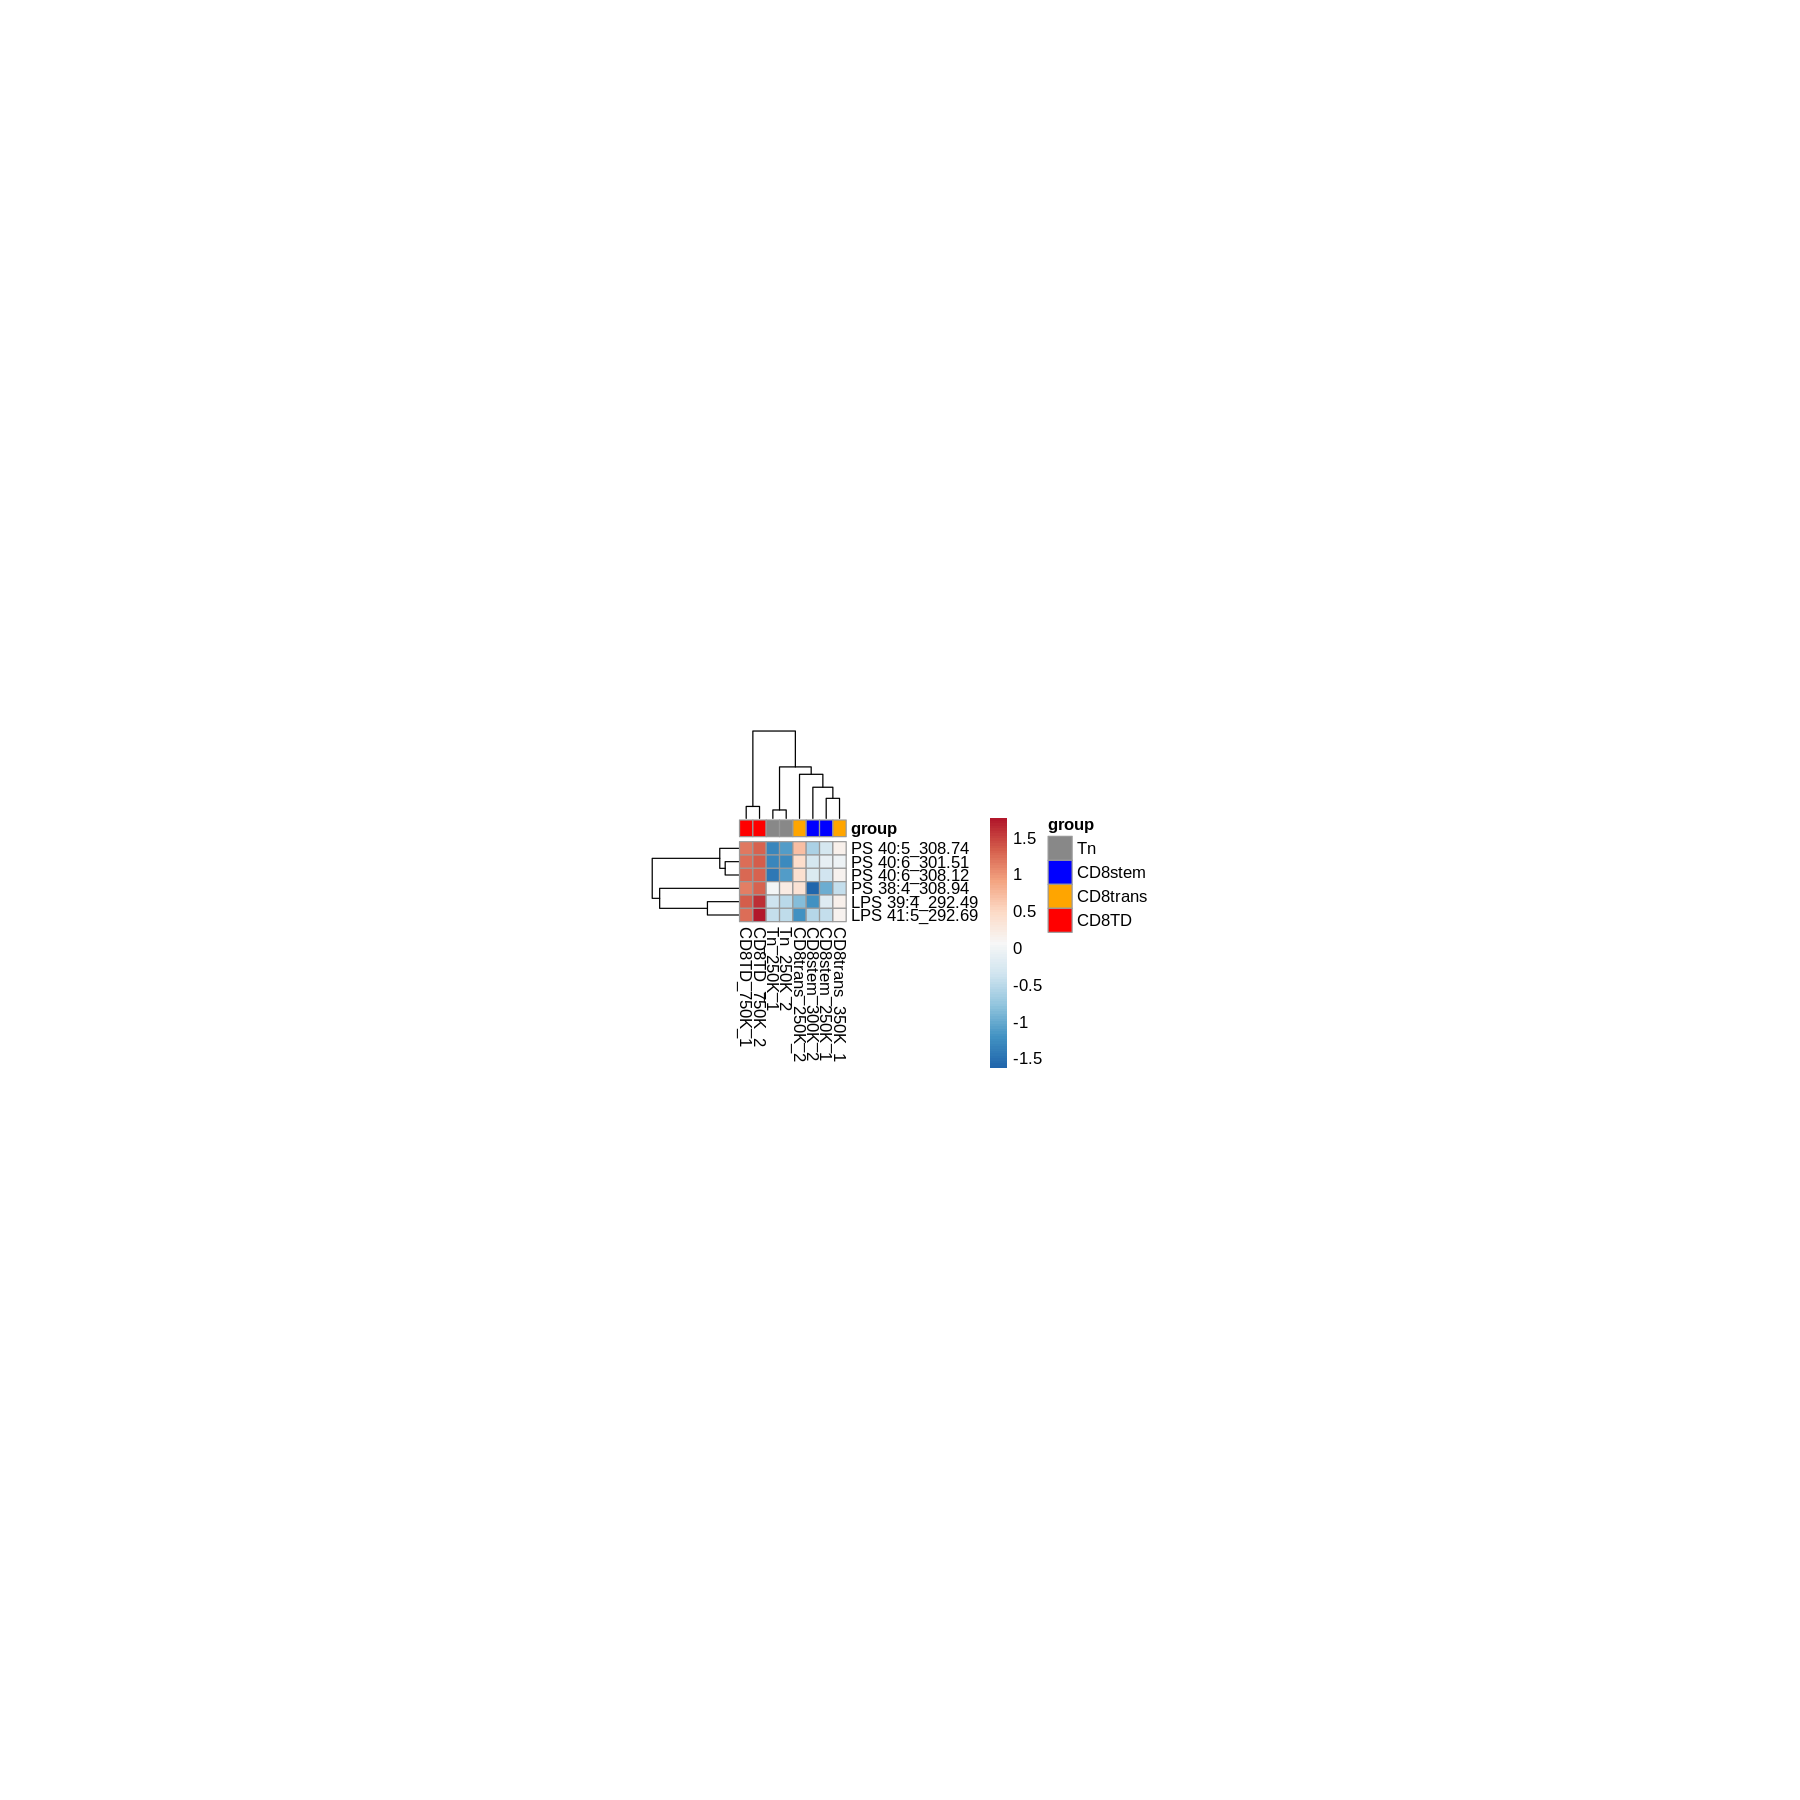

In [40]:
figure_width = 15
figure_height = 15
options(repr.plot.width = figure_width, repr.plot.height = figure_height, res = 300)
library(pheatmap)
p <- pheatmap(feat_df.filt.data.scale,  # data file
         cluster_rows = TRUE, 
         show_rownames = TRUE, 
         cluster_cols = TRUE, 
         annotation_col = annotation_col, 
         clustering_method = "mcquitty",
         cellwidth = 8,
         cellheight = 8,
         color = cell_colors,
         annotation_colors = ann_colors)
ggsave(p, file = out_pdf_file, width = figure_width, height = figure_height, )

-----